In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
ch=pd.read_csv("E:/datasets/Bank_customer_churn_outside.csv")


In [70]:
ch.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [71]:
ch=ch.iloc[:,[1,2,3,4,5,6,7,8,9,10]]

In [72]:
ch.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [73]:
ch.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [74]:
ch.shape

(245725, 10)

In [75]:
ch.describe(include='all')

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


In [76]:
ch.Credit_Product=ch.Credit_Product.fillna('No')
ch.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [78]:
ch[ch.select_dtypes(include=['object']).columns]=ch[ch.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [79]:
ch.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,0,1045696,0,0
1,0,30,27,2,0,32,0,581988,0,0
2,0,56,18,3,2,26,0,1484315,1,0
3,1,34,20,2,0,19,0,470454,0,0
4,0,30,32,2,0,33,0,886787,0,0


In [80]:
from sklearn.model_selection import train_test_split


In [81]:
ch_train,ch_test=train_test_split(ch,test_size=0.2)

In [82]:
train_x=ch_train.iloc[:,0:-1]
train_y=ch_train.iloc[:,-1]
test_x=ch_test.iloc[:,0:-1]
test_y=ch_test.iloc[:,-1]

In [83]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_x,train_y)

LinearRegression()

In [84]:
Rsqure=lr.score(train_x,train_y)
Rsqure

0.10205077016000197

In [85]:
N=train_x.shape[0]
K=train_x.shape[1]

In [86]:
adjRSquare=1-(1-Rsqure)*(N-1)/(N-K-1)
adjRSquare

0.10200965736014156

In [87]:
pred=lr.predict(test_x)

In [88]:
pred

array([0.42922831, 0.2788688 , 0.17016628, ..., 0.25061056, 0.24216021,
       0.20780008])

In [89]:
error=test_y-pred

In [93]:
import numpy as np
MSE=np.mean(np.square(error))
MSE

0.16179771739298804

In [94]:
AMSE=np.abs(MSE)
AMSE

0.16179771739298804

In [104]:
MAPE = np.mean(np.abs(error*100/test_y))
MAPE

inf

In [106]:
Accuracy=1-MAPE
Accuracy

-inf

In [108]:
#Lets us check assumotions
pred_train=lr.predict(train_x)
error_train=train_y-pred_train

In [110]:
np.mean(error_train)

3.054045186673617e-17

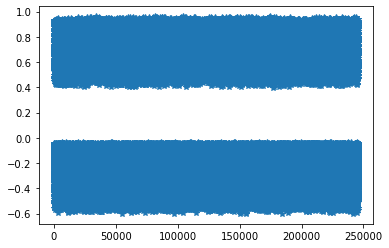

In [111]:
plt.plot(error_train,"*")


<Figure size 1080x1080 with 0 Axes>

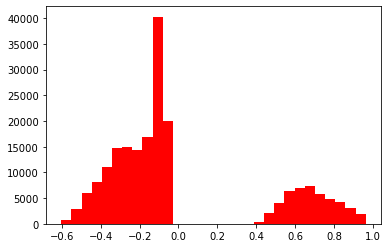

<Figure size 1080x1080 with 0 Axes>

In [112]:
plt.hist(error_train,bins=30,color="r")
plt.figure(figsize=(15,15))

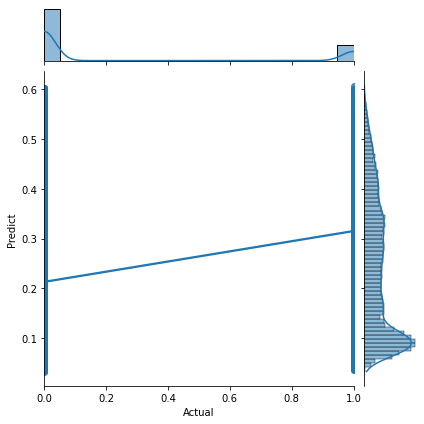

In [113]:
import seaborn as sns
pred_actual=pd.DataFrame({"Predict":pred_train,"Actual":train_y})
sns.jointplot(x="Actual",y="Predict",data=pred_actual,kind='reg')

In [114]:
def remove_outliers(df, col , k ):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    global final_list
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]
    df1 = df.loc[ df[col].isin(final_list)] ; print(df1.shape)
    print("Number of outliers removed == >" , df.shape[0] - df1.shape[0])

In [115]:
remove_outliers(ch, 'Is_Lead' , 2)

(245725, 10)
Number of outliers removed == > 0
